In [306]:
# Utilizzare NumPy per generare una serie temporale
# di 305 giorni di dati, simulando il numero di visitatori giornalieri in
# un ospedale. Assumere che il numero medio di visitatori sia 1200 con una
# deviazione standard di 900. Inoltre, aggiungere un trend decrescente nel
# tempo per simulare l'aumento della popolarità del parco.

In [307]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Dati iniziali
giorni = np.random.randint(1,366)
media_visitatori = 1200
deviazione_standard = 900


In [309]:
#Serie temporale dei visitatori
visitatori_giornalieri = np.random.normal(loc = media_visitatori, scale = deviazione_standard, size = giorni).astype(int)
visitatori_giornalieri = np.maximum(0, visitatori_giornalieri)

In [310]:
#Aggiunta trend decrescente
trend_decrescente = np.linspace(0, -300, giorni).astype(int)
visitatori_con_trend = visitatori_giornalieri + trend_decrescente
visitatori_con_trend = np.maximum(0, visitatori_con_trend)

In [311]:
print(visitatori_giornalieri)


[ 826 2000  787  932 1391 2696 1790 1523 2375 1578    0 3478 1176 2749
 2923  912    0 1740 1207    0 1288 2501 1079 1508 1503  460 3443  813
 2854    0  157 1730  470 2331    0 1397  340 1316 2258    0  395 1869
 1312  412  650   39    0 1734    0  418 1088 1958 1421  507 2112 2233
 1027 1826 1039 3595    0 1048 1159 1901 2777 2807   60  970 1679 1574
  665 1337 1476 2995    0 1086 2316 1627  994 2433 1121  857 1555  400
  780 2403 1922 1836    0 4183 1150 1112  974 1698 1115 1190 1799 1034
   63 2019  165    0 1768 1973 1360  409  210    0 2440 2153 2249  922
  749  702   91 1525    0 1440 1125 1607  393  771  396 2084 1278  843
 3451 1232 1436  548 1356  950  829  424  618 1171  935  722  810  400
 1303  517 2517 1341 2596 1531 2086 1593  721 2961 1966 1676 1057  870
 1862  529  405 2943 1397 1175  734 1173 2061 2191 1753 1508 1016 2274
 2332    0    0 1531    0 1337  232 2078  326 2648    0  645    0 1141
 2846  964 1351  201 1034 1723 2401  534 1102 3195 1736  158 1712  112
 1035 

In [312]:
print(visitatori_con_trend)

[ 826 2000  786  930 1388 2692 1785 1517 2368 1570    0 3469 1166 2738
 2911  899    0 1725 1191    0 1271 2483 1060 1488 1482  438 3420  789
 2830    0  131 1703  442 2302    0 1366  308 1284 2225    0  360 1833
 1275  374  611    0    0 1693    0  375 1044 1913 1375  460 2064 2185
  978 1776  988 3543    0  994 1104 1845 2721 2750    2  911 1619 1513
  603 1274 1412 2931    0 1020 2249 1559  925 2363 1050  785 1483  327
  706 2328 1846 1759    0 4104 1070 1031  893 1616 1032 1106 1714  948
    0 1931   76    0 1678 1882 1268  316  116    0 2344 2056 2152  824
  650  602    0 1423    0 1336 1020 1502  287  664  288 1975 1168  732
 3339 1119 1323  434 1241  834  712  306  499 1051  814  601  688  277
 1179  392 2391 1214 2468 1402 1957 1463  590 2829 1833 1542  922  734
 1725  392  267 2804 1257 1034  592 1030 1917 2046 1608 1362  869 2126
 2183    0    0 1379    0 1183   78 1923  170 2491    0  486    0  980
 2684  802 1188   37  869 1557 2234  366  933 3025 1566    0 1540    0
  861 

In [313]:
# Creare un DataFrame pandas con le date come
# indice e il numero di visitatori come colonna e una collonna casuale
# della patologia scelta fra 3(ossa, cuore, testa ).

In [314]:
#colonna date 
date = pd.date_range(start="2023-01-01", periods=giorni, freq="D")

#colonna patologie
patologie = np.random.choice(["ossa", "cuore", "testa"], size=giorni)

In [315]:
#Creazione DataFrame
df = pd.DataFrame(index = date, data={'Visitatori': visitatori_con_trend, 'Patologia': patologie})

#Imposto il valore none alla colonna patologie per le righe con zero visitatori
df.loc[df['Visitatori'] == 0, 'Patologia'] = None

In [316]:
#Visualizzo il DataFrame
df

,Visitatori,Patologia
2023-01-01,826,testa
2023-01-02,2000,testa
2023-01-03,786,testa
2023-01-04,930,ossa
2023-01-05,1388,testa
...,...,...
2023-11-30,1818,cuore
2023-12-01,2871,cuore
2023-12-02,2045,cuore
2023-12-03,932,cuore


In [317]:
#Calcolare il numero medio di visitatori per mese e la
#deviazione standard e quale patologia è più e quale meno trovata.

In [325]:
def media_visitatori(df):
    media = df['Visitatori'].mean()
    return media


def media_mensile(df):
    media_mensile = df.groupby(df.index.month)["Visitatori"].mean()
    return media_mensile

print("Media totale: ",media_visitatori(df))

print("Media mensile: ", media_mensile(df))

Media totale:  1089.9378698224853
Media mensile:  1     1463.000000
2     1033.357143
3     1475.032258
4     1019.533333
5     1163.548387
6     1070.666667
7      978.806452
8     1160.193548
9      688.400000
10     699.387097
11    1167.233333
12    1487.750000
Name: Visitatori, dtype: float64


In [326]:
def deviazione_standard(df):
    deviazione_standard = df['Visitatori'].std()
    return deviazione_standard

def deviazione_standard_mensile(df):
    deviazione_standard_mensile = df.groupby(df.index.month)['Visitatori'].std()
    return deviazione_standard_mensile

print("Deviazione standard totale: ",deviazione_standard(df))
print("Deviazione standard mensile: ", deviazione_standard_mensile(df))


Deviazione standard totale:  841.764124815091
Deviazione standard mensile:  1     1015.952624
2      785.605745
3     1036.822694
4      726.209941
5      796.107314
6      837.029078
7      817.267619
8      754.387099
9      672.705172
10     672.362287
11     737.974006
12    1217.962609
Name: Visitatori, dtype: float64


In [320]:
#Patologia più e meno trovata
def patologia_piu_trovata(df):
    patologia_piu_trovata = df['Patologia'].value_counts().idxmax()
    return patologia_piu_trovata

def patologia_meno_trovata(df):
    patologia_meno_trovata = df['Patologia'].value_counts().idxmin()
    return patologia_meno_trovata


print("La patologia più trovata è ",patologia_piu_trovata(df))

print("La patologia meno trovata è", patologia_meno_trovata(df))

La patologia più trovata è  testa
La patologia meno trovata è ossa


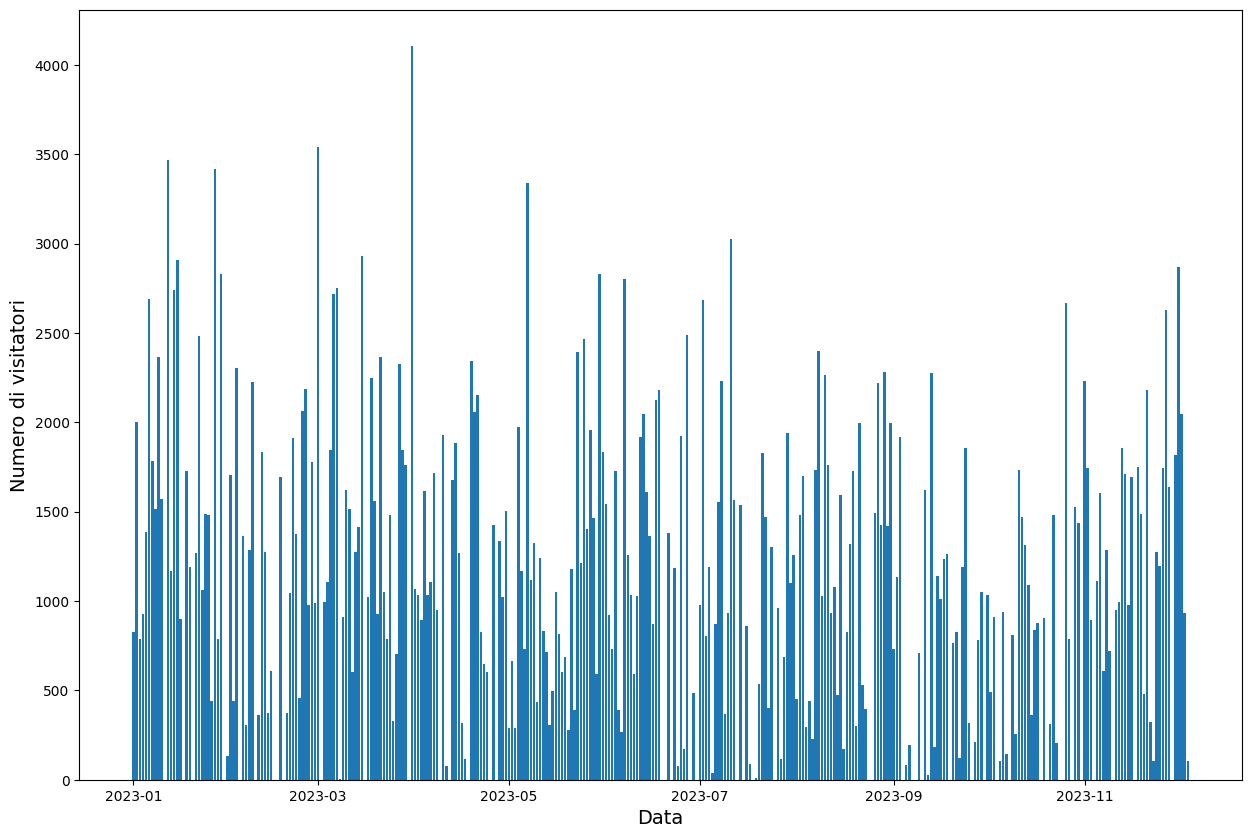

In [321]:
#Grafico a linee per il numero di vistatori giornaliero
plt.figure(figsize=(15,10))
plt.bar(df.index,df["Visitatori"], label = 'Visitatori totali per giorno')
plt.xlabel('Data', fontsize=14)
plt.ylabel('Numero di visitatori', fontsize= 14)
plt.show()

In [322]:
#media mensile del numero di visitatori
media_mensile = df.groupby(df.index.month)["Visitatori"].mean()

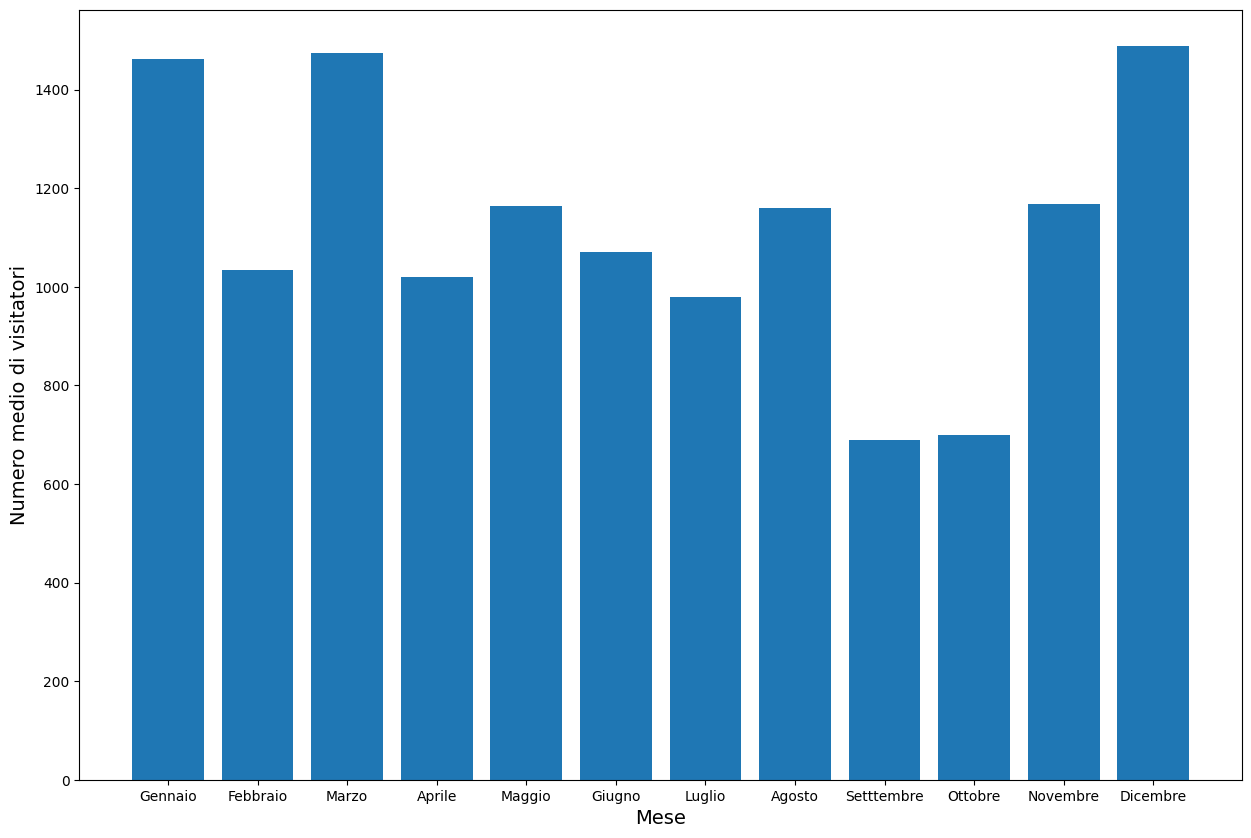

In [323]:
plt.figure(figsize=(15,10))
plt.bar(media_mensile.index, media_mensile, label = 'Media mensile dei visitatori')
plt.xlabel('Mese', fontsize=14)
plt.ylabel('Numero medio di visitatori', fontsize= 14)
plt.xticks(np.arange(1, 13), ["Gennaio", "Febbraio", "Marzo", "Aprile", "Maggio", "Giugno", "Luglio", "Agosto", "Setttembre","Ottobre","Novembre","Dicembre"])
plt.show()

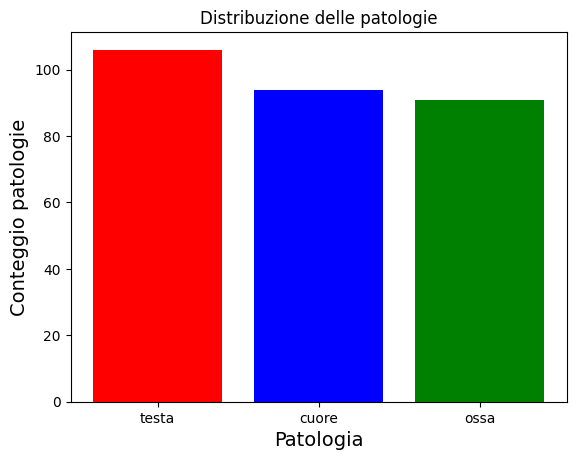

In [324]:
#Grafico per le tre patologie

#Conto ciascuna patologia
conteggio_patologie = df["Patologia"].value_counts()

#print(conteggio_patologie)


plt.bar(conteggio_patologie.index, conteggio_patologie.values, color=['red', 'blue', 'green'])


plt.xlabel('Patologia', fontsize=14)
plt.ylabel('Conteggio patologie', fontsize= 14)
plt.title('Distribuzione delle patologie')
plt.xticks(rotation = 0)
plt.show()